# Image Analysis - Homework 3
### Due October 16th, 2024
#### Problem 1 (Convolution and Filtering)

In [2]:
# Import your dang packages
import time
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

from scipy import ndimage
from skimage import io, color, filters
from PIL import Image

In [88]:
# load up the image to be convolved
crater_img = io.imread('images/homework_3/crater_lake.png')

# Make grayscale
if crater_img.shape[2] == 4:
    crater_rgb = crater_img[:, :, :3]  # Discard the alpha channel
    crater_gray = color.rgb2gray(crater_rgb)  # Convert RGB to grayscale
else:
    # If the image is not RGBA, assume it's already in RGB or grayscale
    crater_gray = color.rgb2gray(crater_img)
# print(gray_crater.shape) # Confirm values

# make the kernel 11x11 and normalize
kern = np.ones((11, 11)) / 121

plt.imsave('images/homework_3/crater_gray.png', crater_gray, cmap='gray')
# print(kern)

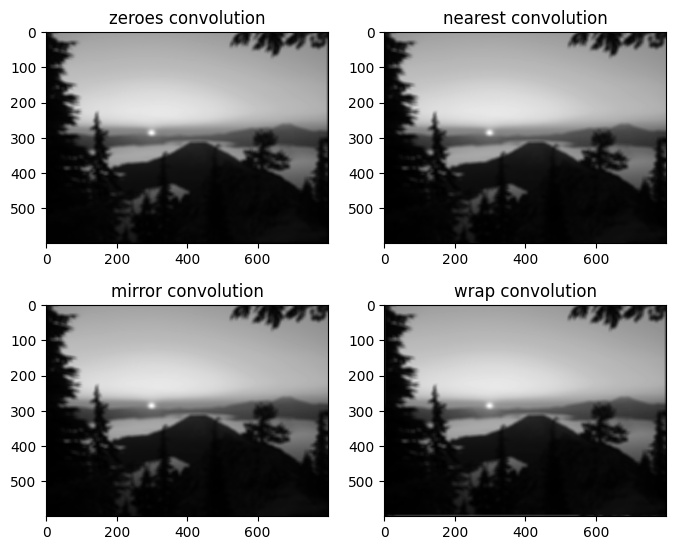

In [84]:
# convolve these bad jessies
conv_crater_zero = ndimage.convolve(crater_gray, kern, mode='constant', cval=0)
conv_crater_mir = ndimage.convolve(crater_gray, kern, mode='mirror')
conv_crater_wrap = ndimage.convolve(gray_crater, kern, mode='wrap')
conv_crater_near = ndimage.convolve(crater_gray, kern, mode='nearest')

fig, axes = plt.subplots(2, 2, figsize=(8, 6.5))
ax = axes.ravel()

ax[0].imshow(conv_crater_zero, cmap='gray')
ax[0].set_title('zeroes convolution')
# ax[0].axis('off')

ax[1].imshow(conv_crater_near, cmap='gray')
ax[1].set_title('nearest convolution')
# ax[1].axis('off')

ax[2].imshow(conv_crater_mir, cmap='gray')
ax[2].set_title('mirror convolution')
# ax[2].axis('off')

ax[3].imshow(conv_crater_wrap, cmap='gray')
ax[3].set_title('wrap convolution')
# ax[3].axis('off')

plt.tight_layout

plt.savefig('images/homework_3/convolution_grid.png')

# io.imshow(conv_crater_ref, cmap='gray')
# io.imshow(conv_crater_mir, cmap='gray')

#### This has workedwell so let's zoom in!

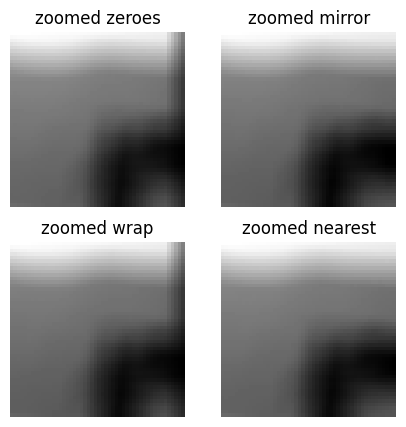

In [85]:
zoomed_zero = conv_crater_zero[275:325, 750:800]
zoomed_mir = conv_crater_mir[275:325, 750:800]
zoomed_wrap = conv_crater_wrap[275:325, 750:800]
zoomed_near = conv_crater_near[275:325, 750:800]

plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.imshow(zoomed_zero, cmap='gray')
plt.title('zoomed zeroes')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(zoomed_mir, cmap='gray')
plt.title('zoomed mirror')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(zoomed_wrap, cmap='gray')
plt.title('zoomed wrap')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(zoomed_near, cmap='gray')
plt.title('zoomed nearest')
plt.axis('off')

plt.savefig('images/homework_3/zoomed_conv.png')
plt.show()

#### Problem 2 (Gaussian filter) (a)

In [145]:
tfj_img = io.imread('images/homework_3/tfj.png').astype(np.uint8)
tfj_rgb = tfj_img[:, :, :3]
tfj_gray = (color.rgb2gray(tfj_rgb)*255).astype(np.uint8)

plt.imsave('images/homework_3/tfj_gray.png', tfj_gray, cmap='gray')

In [3]:
# Function to make a gauss kernel
# May refactor this to take in any function?
def gauss_kernel(size, sig):
    # Need half size to center gaussian
    half_size = size // 2
    lsp = np.linspace(-half_size, half_size, size)

    # make evenly spaced fellers centered on the origin and grid them
    x, y = lsp, lsp
    x, y = np.meshgrid(x, y)

    # Keep r what it is so the final calculation looks normal
    r = np.sqrt(x**2 + y**2)

    # make the kernel and return normalized version
    kern = np.exp(-r**2 / (2 * sig**2))

    return kern / kern.sum()

In [162]:
# Declare some sigmas, a size, and make the two kernels
sig_1, sig_2 = 3, 20
size = 20

gk_1, gk_2 = gauss_kernel(size, sig_1), gauss_kernel(size, sig_2)

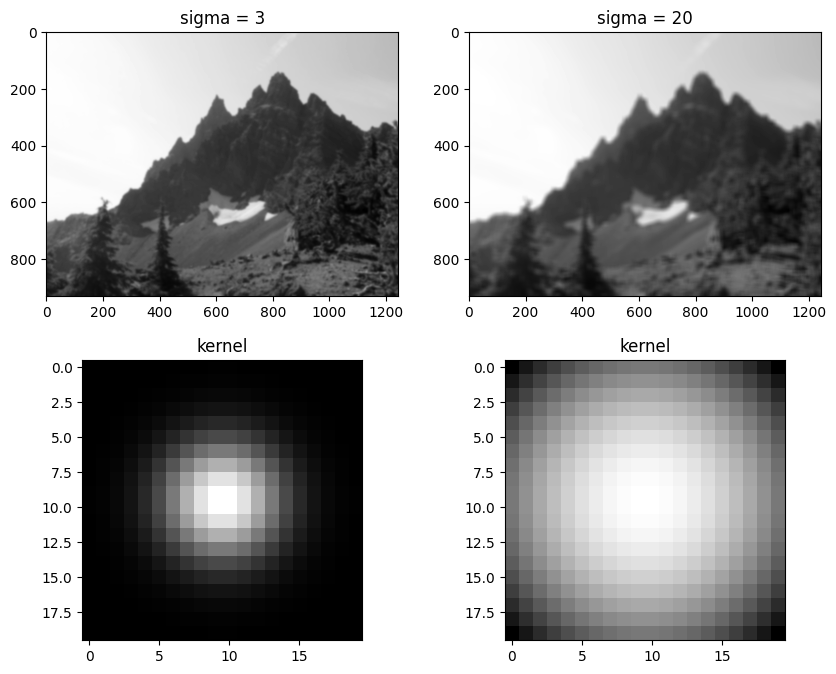

In [163]:
# Convolve and display the new images
tfj_gauss_1 = ndimage.convolve(tfj_gray, gk_1)
tfj_gauss_2 = ndimage.convolve(tfj_gray, gk_2)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(tfj_gauss_1, cmap='gray')
ax[0].set_title('sigma = 3')

ax[1].imshow(tfj_gauss_2, cmap='gray')
ax[1].set_title('sigma = 20')

ax[2].imshow(gk_1, cmap='gray')
ax[2].set_title('kernel')

ax[3].imshow(gk_2, cmap='gray')
ax[3].set_title('kernel')

plt.savefig('images/homework_3/gauss_conv_grid.png')

#### (b)

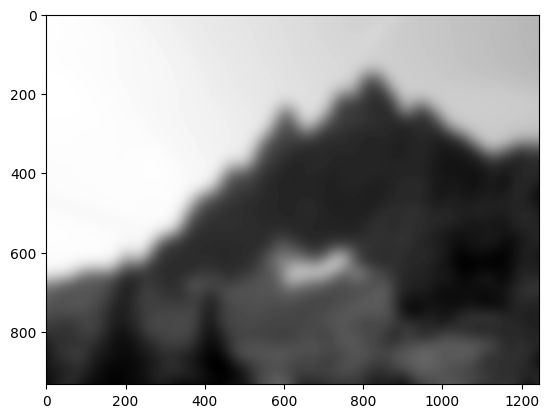

In [164]:
tfj_builtin_gauss = (filters.gaussian(tfj_gray, sigma=20)*255).astype(np.uint8)
plt.imshow(tfj_builtin_gauss, cmap='gray')

plt.savefig('images/homework_3/tfj_builtin_gauss.png')

#### (c)

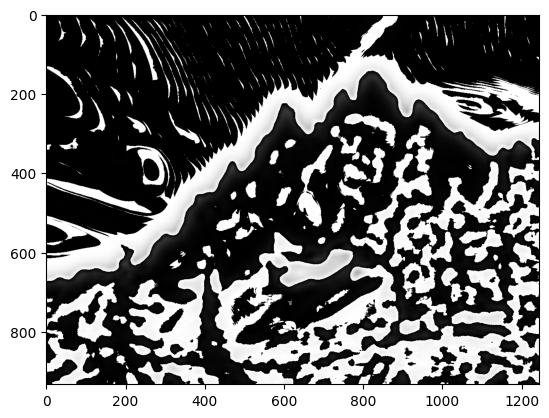

In [165]:
# Had to roll back and make sure my values were all uint8
gauss_diff = (tfj_builtin_gauss) - (tfj_gauss_2)
plt.imshow(gauss_diff, cmap='gray')
# print(np.min(gauss_diff), np.max(gauss_diff)) # used to make sure uint8

plt.savefig('images/homework_3/gauss_diff.png')

#### (d)

In [166]:
# Do the time analysis for 
t1 = time.time()
kern = gauss_kernel(size, 20)
timed_tfj_man = ndimage.convolve(tfj_gray, kern)
t2 = time.time()
manual_time = t2 - t1

t1 = time.time()
time_tfj_builtin = filters.gaussian(tfj_gray, sigma=20)
t2 = time.time()
builtin_time = t2 -t1

print('manual time:', manual_time)
print('builtin time:', builtin_time)

manual time: 0.4357619285583496
builtin time: 0.1830759048461914


###### After adjusting the kernel size this worked. However when I used a kernel size of 11, my manual method was faster by about 20ms.
###### The reason why the builtin function is faster is because it's seperable. What they do is break down an M x N matrix of values for the convolution kernel into 1D arrays, such that it is now only passed as an M + N operation. One is applied in the horizontal direction and one in the vertical, usually in that order. This makes the number of calculations O(n) instead of O(n²).

#### Problem 3 (Median filtering)

median time: 0.1524827480316162
15 239


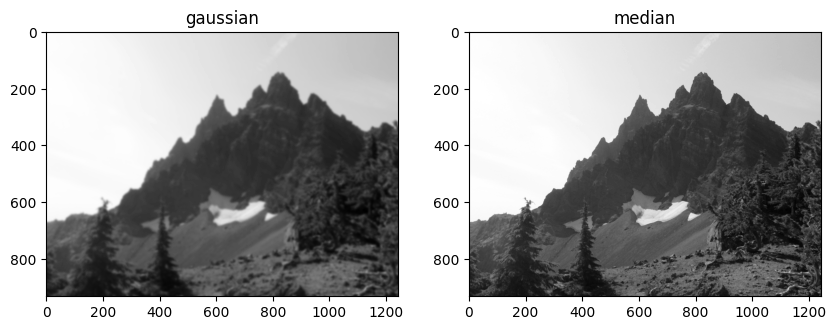

In [203]:
# We can just reuse the original image but for the sake of only having to run 
# this chunk in the future, I've decided to copy past the imread here
tfj_img = io.imread('images/homework_3/tfj.png').astype(np.uint8)
tfj_rgb = tfj_img[:, :, :3]
tfj_gray = (color.rgb2gray(tfj_rgb)*255).astype(np.uint8)

# gauss filtered image
sig_3 = 3
tfj_gauss_3 = (filters.gaussian(tfj_gray, sigma=sig_3)*255).astype(np.uint8)

# Define a neighborhood based on sig_3
med_neighborhood = np.ones((sig_3, sig_3))

t1 = time.time()
tfj_median = filters.median(tfj_gray, med_neighborhood)
t2 = time.time()

median_time = t2 - t1
print('median time:', median_time)

med_gauss_diff = (tfj_median - tfj_gauss_3).astype(np.uint8)
# print(np.max(med_gauss_diff), np.min(med_gauss_diff))

fig, axes = plt.subplots(1, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(tfj_gauss_3, cmap='gray')
ax[0].set_title('gaussian')

ax[1].imshow(tfj_median, cmap='gray')
ax[1].set_title('median')

print(np.min(tfj_gauss_3), np.max(tfj_gauss_3))

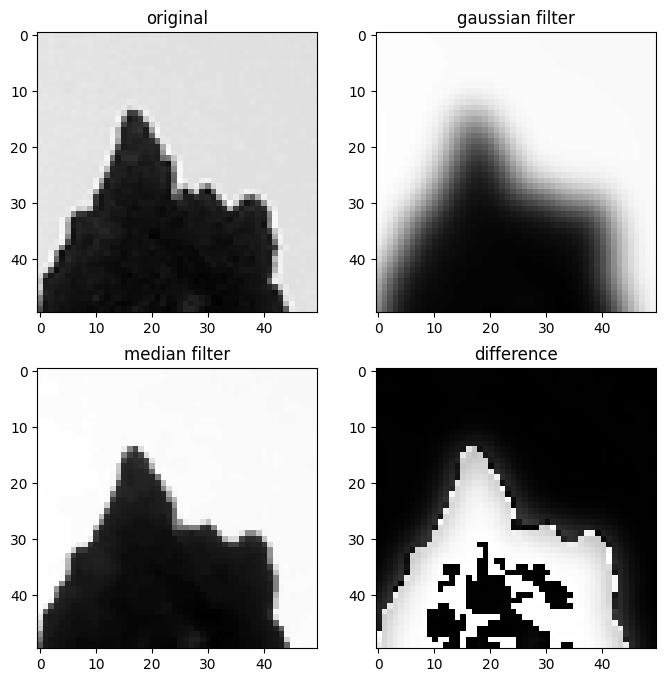

In [206]:
x_zoom, y_zoom = 585, 210
dx, dy = 50, 50

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(tfj_gray[y_zoom:(y_zoom + dy), x_zoom:(x_zoom + dx)], cmap='gray')
ax[0].set_title('original')

ax[1].imshow(tfj_gauss_3[y_zoom:(y_zoom + dy), x_zoom:(x_zoom + dx)], cmap='gray')
ax[1].set_title('gaussian filter')

ax[2].imshow(tfj_median[y_zoom:(y_zoom + dy), x_zoom:(x_zoom + dx)], cmap='gray')
ax[2].set_title('median filter')

ax[3].imshow(med_gauss_diff[y_zoom:(y_zoom + dy), x_zoom:(x_zoom + dx)], cmap='gray')
ax[3].set_title('difference')

plt.savefig('images/homework_3/median_gauss_grid.png')


###### This is more or less what we expect. We see that the median filter washes out some very subtle detail in the original and the gaussian just blurs it to heck. The difference is seen most prevelant at the edges as well.

#### Problem 4 (Filtering and thresholding.)

3


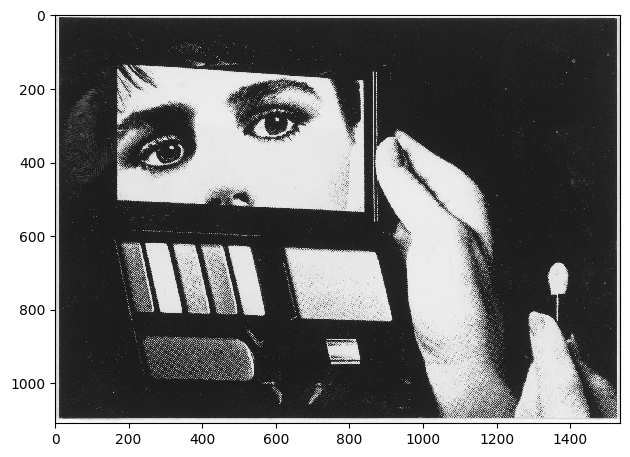

In [8]:
# First load the new image
makeup_img = io.imread('images/homework_3/MakeUp_RichardPrince_1983_gray.png').astype(np.uint8)
# print(np.min(makeup_img))
# io.imshow(makeup_img)

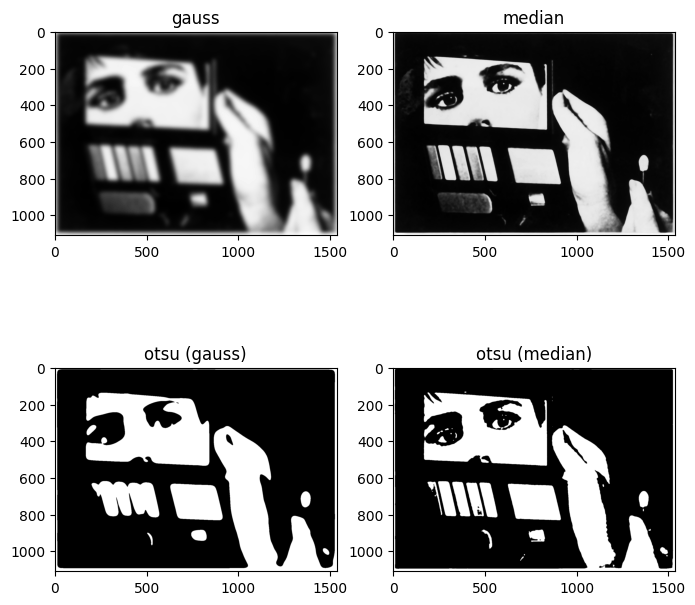

In [15]:
# Set up sigma and median neighborhood and apply fliters to original image
sig_4 = 11
med_neigh_2 = np.ones((sig_4, sig_4))

makeup_gauss = filters.gaussian(makeup_img, sigma=sig_4)
makeup_med = filters.median(makeup_img, med_neigh_2)

# Otsu stuff straight from homework 2
makeup_gauss_thresh = filters.threshold_otsu(makeup_gauss)
makeup_med_thresh = filters.threshold_otsu(makeup_med)

makeup_gauss_otsu = makeup_gauss > makeup_gauss_thresh
makeup_med_otsu = makeup_med > makeup_med_thresh

# plot it all
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(makeup_gauss, cmap='gray')
ax[0].set_title('gauss')

ax[1].imshow(makeup_med, cmap='gray')
ax[1].set_title('median')

ax[2].imshow(makeup_gauss_otsu, cmap='gray')
ax[2].set_title('otsu (gauss)')

ax[3].imshow(makeup_med_otsu, cmap='gray')
ax[3].set_title('otsu (median)')

plt.savefig('images/homework_3/otsu_grid.png')

#### Problem 5 (High-pass filtering)

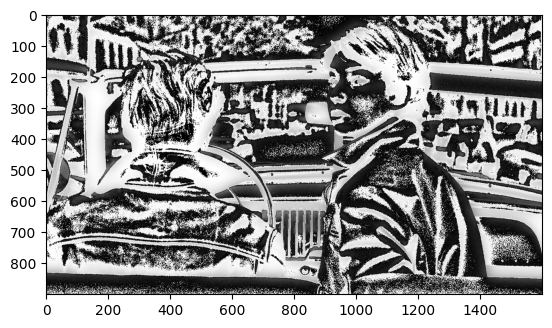

In [87]:
# Read in image and set sigma to 21 as instructed
gallows_img = io.imread('images/homework_3/Elevator_to_the_gallows.png').astype(np.uint8)
sig_5 = 21
# print(gallows_img.shape)
# print(np.min(gallows_img), np.max(gallows_img))

# Apply a gaussian filter then make a high pass by subtracting the low pass from the original
gallows_gauss = (filters.gaussian(gallows_img, sig_5)*255).astype(np.uint8)
gallows_high = (gallows_img - gallows_gauss)

gallows_high[gallows_high < 0] = 0

# print(np.min(gallows_high))

# plt.imshow(gallows_gauss, cmap='gray')
plt.imshow(gallows_high, cmap='gray')

plt.savefig('images/homework_3/gallows_high.png')


#### Problem 6 (Band-pass filtering.)

In [205]:
def shift_points(array):
    array = array - np.min(array)
    scaled_array = ((array / np.max(array))*255).astype(np.uint8)

    return scaled_array

def band_pass(orig, high, low, iter=1):
    for i in range(iter):
        orig = orig - high - low

    return orig

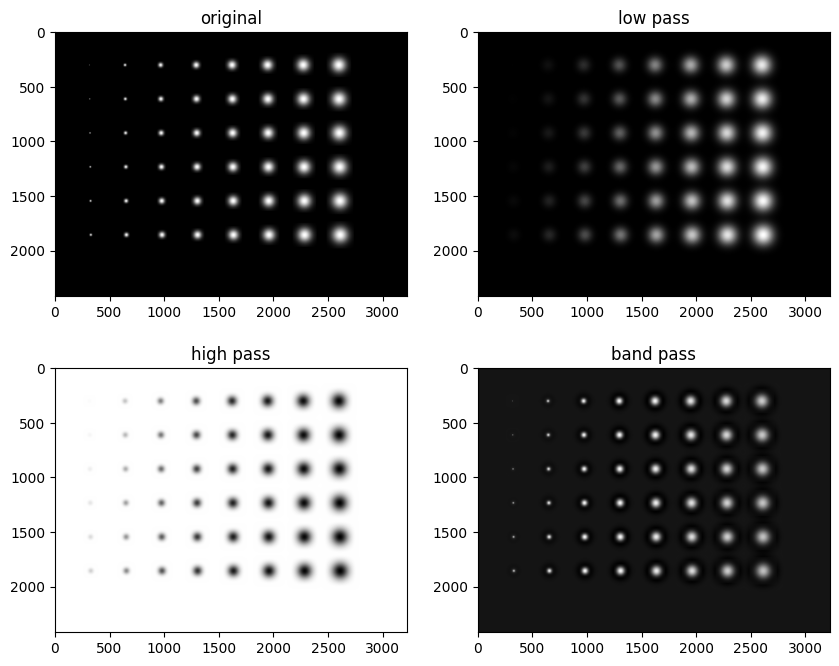

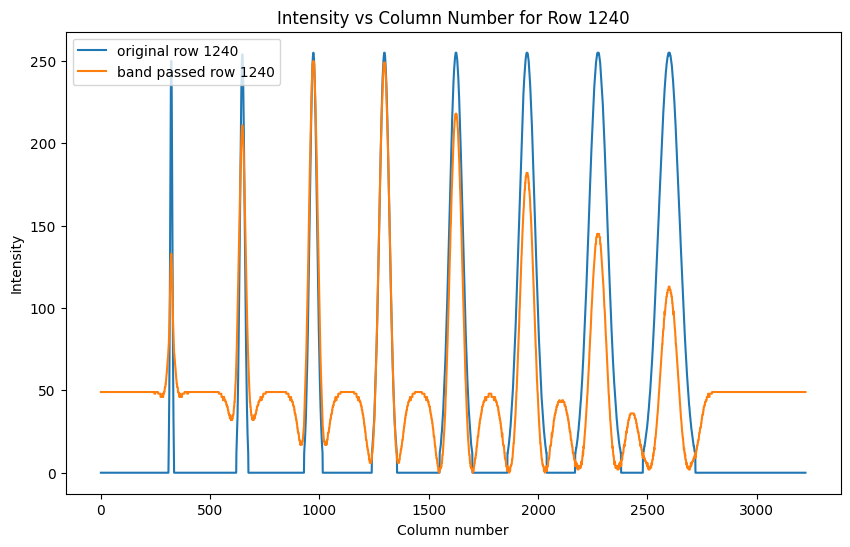

In [211]:

# Load up that image!
dots_tif = (io.imread('images/homework_3/gaussians_s2_to_s50_px.tif')).astype(np.float32)

dots_low = (filters.gaussian(dots_tif, sigma=40)*255).astype(np.float32)
dots_low = shift_points(dots_low)

# Try a high pass to isolate the larger dots
# dots_high = (dots_tif - dots_low).astype(np.float32)
dots_high = dots_tif - (filters.gaussian(dots_tif, sigma=15)*255).astype(np.float32)
dots_high = shift_points(dots_high)

# # Now if I subtract both filters from the original, I should get a band pass
# dots_band = dots_tif - dots_high - dots_low
# dots_band = shift_points(dots_band)

# Now if I run it through the band filter multiple times I can isolate the middle dots even better!
band_test = band_pass(dots_tif, dots_high, dots_low, 8)
band_test = shift_points(band_test)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(dots_tif, cmap='gray')
ax[0].set_title('original')

ax[1].imshow(dots_low, cmap='gray')
ax[1].set_title('low pass')

ax[2].imshow(dots_high, cmap='gray')
ax[2].set_title('high pass')

ax[3].imshow(dots_band, cmap='gray')
ax[3].set_title('band pass')

# Try plotting the row 1240 results
orig_row_1240 = dots_tif[1240, :]
band_row_1240 = band_test[1240, :]


plt.figure(figsize=(10, 6))

plt.plot(orig_row_1240, label='original row 1240')
plt.plot(band_row_1240, label='band passed row 1240')
plt.title('Intensity vs Column Number for Row 1240')
plt.xlabel('Column number')
plt.ylabel('Intensity')
plt.legend()

plt.show()




#### Problem 7 (Signal to noise ratio.) (a)

In [227]:
def gen_poisson(r, t, b=2, size=(27, 27)):
    # random bg
    img = np.random.poisson(lam=b * t, size=size)
    
    # random pixel signal
    signal_output = np.random.poisson(lam=r * t)

    # calc center
    cent = (size[0] // 2, size[1] // 2) 
    
    # put signal at center
    img[cent] += signal_output
    
    return img

Text(0.5, 1.0, 'r=10')

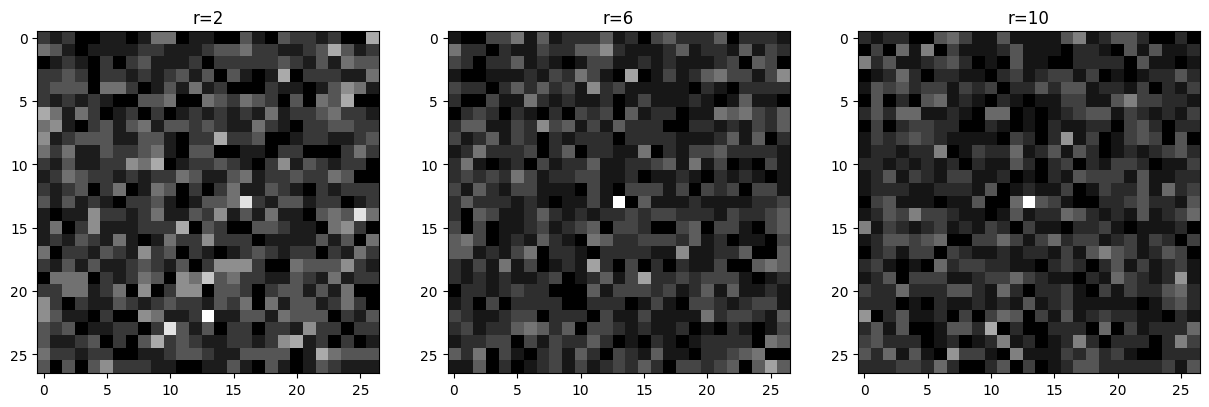

In [232]:
rs = [2, 6, 10] # r vals
t = 1  # ms

# gen images
imgs = [gen_poisson(rs[0], t), gen_poisson(rs[1], t), gen_poisson(rs[2], t)]

# plot those bad jessies
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(imgs[0], cmap='gray')
ax[0].set_title('r=2')

ax[1].imshow(imgs[1], cmap='gray')
ax[1].set_title('r=6')

ax[2].imshow(imgs[2], cmap='gray')
ax[2].set_title('r=10')

#### (b)

In [233]:
def calc_snr(img):
    # signal at center
    cent = (img.shape[0] // 2, img.shape[1] // 2)
    signal = img[cent]

    # noise is std of all other pixels
    # Points at the center pixel using 13 * 27 (which is halfway through rows) + 13
    noise = np.std(np.delete(img.flatten(), cent[0] * img.shape[1] + cent[1]))

    # calculate the signal to noise ratio
    if noise > 0:
        snr = signal / noise
    else:
        noise = 0

    return snr

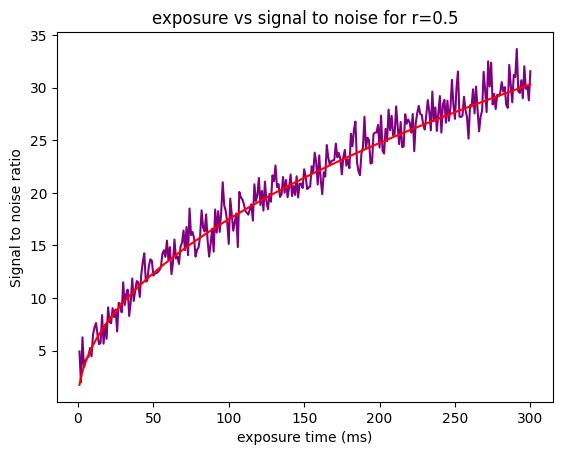

In [242]:
# make an array of times
expo_times = np.arange(1, 301)
r = 0.5 # given in problem

# make a blank array for signal to noise ratios
snrs = []

# iterate through exposure times and generate images and calculate signal to noise ratios
for t in expo_times:
    img = gen_poisson(r, t)
    snr = calc_snr(img)
    snrs.append(snr)

A = 1.75

# plot all this stuff
plt.plot(expo_times, snrs, 'purple')
plt.xlabel('exposure time (ms)')
plt.ylabel('Signal to noise ratio')
plt.title('exposure vs signal to noise for r=0.5')
plt.plot(expo_times, A*np.sqrt(expo_times), 'red')
plt.show()

#### Problem 8 (A little bit of Fourier transforming.)

Image shape:  (512, 512)


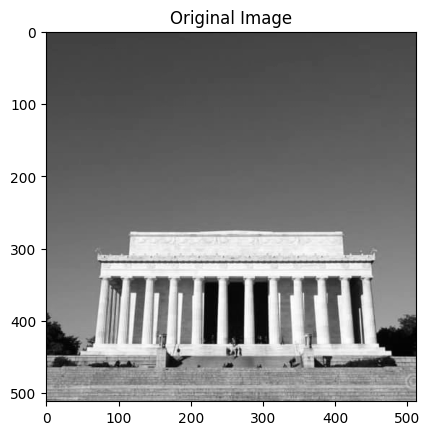

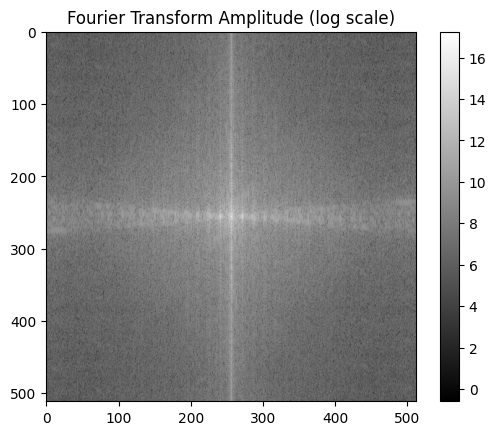

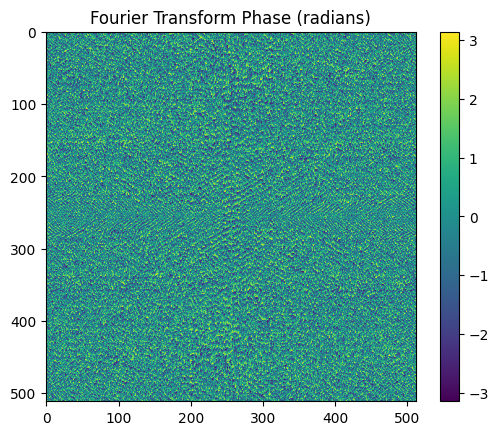

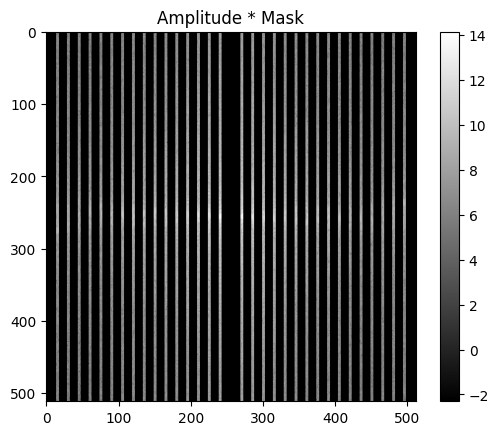

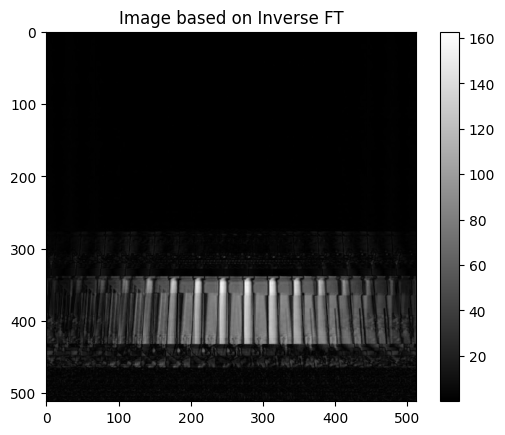

In [245]:
# -*- coding: utf-8 -*-
# fourier_masking_HWproblem.py
"""
Author:   Raghuveer Parthasarathy
Created on Tue Oct  8 07:25:53 2024
Last modified on Oct. 12, 2024

Description
-----------

For a homework problem on masking Fourier Transforms

"""

import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io # input output sub-package 


#%% Load the image
im = io.imread('images/homework_3/Lincoln_Coleman_40-copyright-havecamerawilltravel-com_crop512_gray.png')

if im.ndim > 2:
    # A bit silly, since I know this is 2D
    im = np.mean(im, axis=2, dtype=im.dtype)

print('Image shape: ', im.shape)
# Image size; I'm not checking if it's square!
# The Lincoln Memorial image is 512x512
N = im.shape[0]

plt.figure()
plt.imshow(im, 'gray')
plt.title('Original Image')

#%% Fourier Transform

# Perform 2D Fourier transform
F = np.fft.fft2(im)  # Fast Fourier Transform
F_shifted = np.fft.fftshift(F)  # Shift so zero frequency is in the center

# Calculate the amplitude and phase
amplitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

# Display amplitude as an image
plt.figure()
plt.title("Fourier Transform Amplitude (log scale)")
# Should maybe add an offset to avoid -Inf,
# but I've tested and there are no zeros.
plt.imshow(np.log(amplitude), cmap='gray') 
plt.colorbar()
plt.show()

# Display phase as an image
plt.figure()
plt.title("Fourier Transform Phase (radians)")
plt.imshow(phase)
plt.colorbar()
plt.show()

#%% Masking

# "Fundamental frequency" for the mask
f0 = 15 # I determined this "by hand"
# Full width of the mask -- should be an even number
df = 4

# Create a mask array
mask = np.ones((N, N))
for k in range(1, N//(2*f0)):
    center_f = N/2 + k*f0
    mask[:, int(center_f - df/2):int(center_f + df/2)] = 0
    center_f = N/2 - k*f0
    mask[:, int(center_f - df/2):int(center_f + df/2)] = 0

################
# ALTERED LINE
################
mask = 1 - mask

# Create a new amplitude array that is the original multiplied by this mask
new_amplitude = amplitude * mask

# Display the new amplitude as an image
plt.figure()
plt.title("Amplitude * Mask")
plt.imshow(np.log(new_amplitude + 0.1), cmap='gray') # + 0.1 because of zeros.
plt.colorbar()
plt.show()


# Combine new amplitude with original phase
new_F_shifted = new_amplitude * np.exp(1j * phase)

# Perform the inverse Fourier transform
new_F = np.fft.ifftshift(new_F_shifted)
new_im = np.fft.ifft2(new_F)
new_im = np.abs(new_im)

# Display the resulting image
plt.figure()
plt.title("Image based on Inverse FT")
plt.imshow(new_im, cmap='gray')
plt.colorbar()
plt.show()

##### What's happening is that the code is zeroing out specific frequencies by using the mask. When attempting to reconstruct the image, these frequencies no longer contribute. This is why we see the columsns being washed out because they're (maybe) the most... uh... frequency dependent structure. Maybe a better wording would be that they're the repetitive portion of the image that's still visually distinct. The steps are still repetitive but not so distinct. In the context of extremes, the more frequencies we mask, the more washed out we would make the image.

#### (b)
##### All we need to do is change the mask before the "new_amplitude" calculation to mask = 1-mask. This essentially flips the mask to zero out all of the non reptitive features while keeping the most repetitive features.